# Heart Disease Prediction - Exploratory Data Analysis
## MLOps Assignment - Part 1: Data Acquisition & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Data Loading

In [2]:
# Load the dataset
df = pd.read_csv('../data/heart_disease_raw.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (303, 14)

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Feature Descriptions:
- **age**: Age in years
- **sex**: Sex (1 = male; 0 = female)
- **cp**: Chest pain type (0-3)
- **trestbps**: Resting blood pressure (mm Hg)
- **chol**: Serum cholesterol (mg/dl)
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg**: Resting electrocardiographic results (0-2)
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise
- **slope**: Slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
- **target**: Diagnosis (0 = no disease; 1-4 = disease severity)

## 2. Data Information and Statistics

In [3]:
# Data types and non-null counts
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
# Statistical summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## 3. Missing Values Analysis

Missing Values Summary:
      Missing Values  Percentage
ca                 4    1.320132
thal               2    0.660066


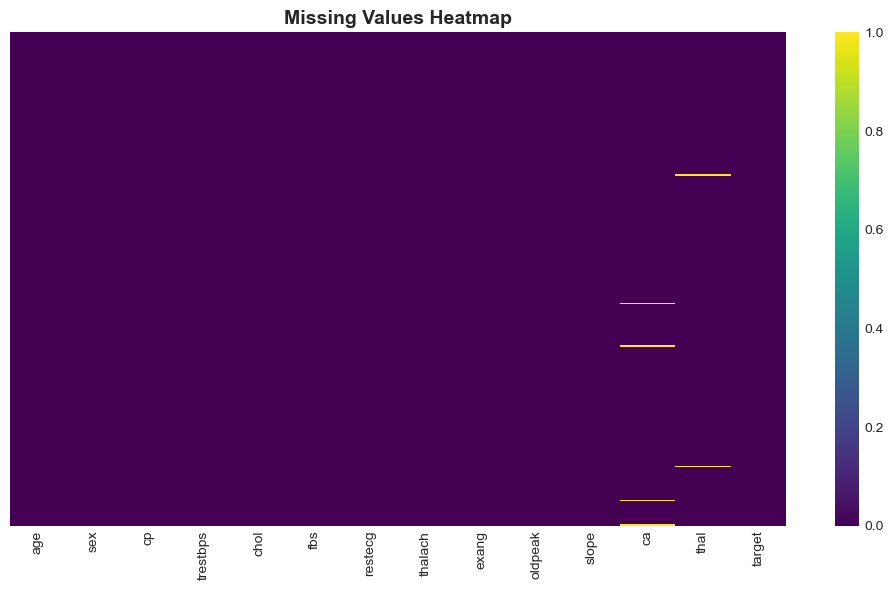

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

print("Missing Values Summary:")
print(missing_df[missing_df['Missing Values'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../screenshots/missing_values_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Target Variable Analysis

In [6]:
# Convert multi-class target to binary (0 = no disease, 1 = disease)
df['target_binary'] = (df['target'] > 0).astype(int)

# Target distribution
print("Original Target Distribution:")
print(df['target'].value_counts().sort_index())
print("\nBinary Target Distribution:")
print(df['target_binary'].value_counts())

Original Target Distribution:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Binary Target Distribution:
target_binary
0    164
1    139
Name: count, dtype: int64


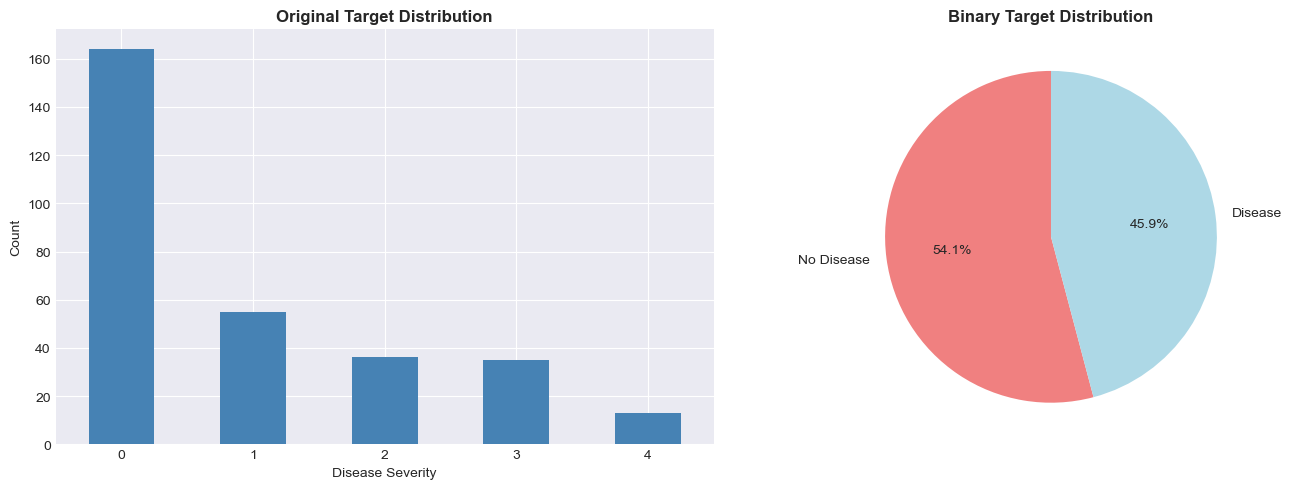

In [7]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original target
df['target'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Original Target Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Disease Severity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Binary target
target_counts = df['target_binary'].value_counts()
axes[1].pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', 
            startangle=90, colors=['lightcoral', 'lightblue'])
axes[1].set_title('Binary Target Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../screenshots/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Feature Distributions

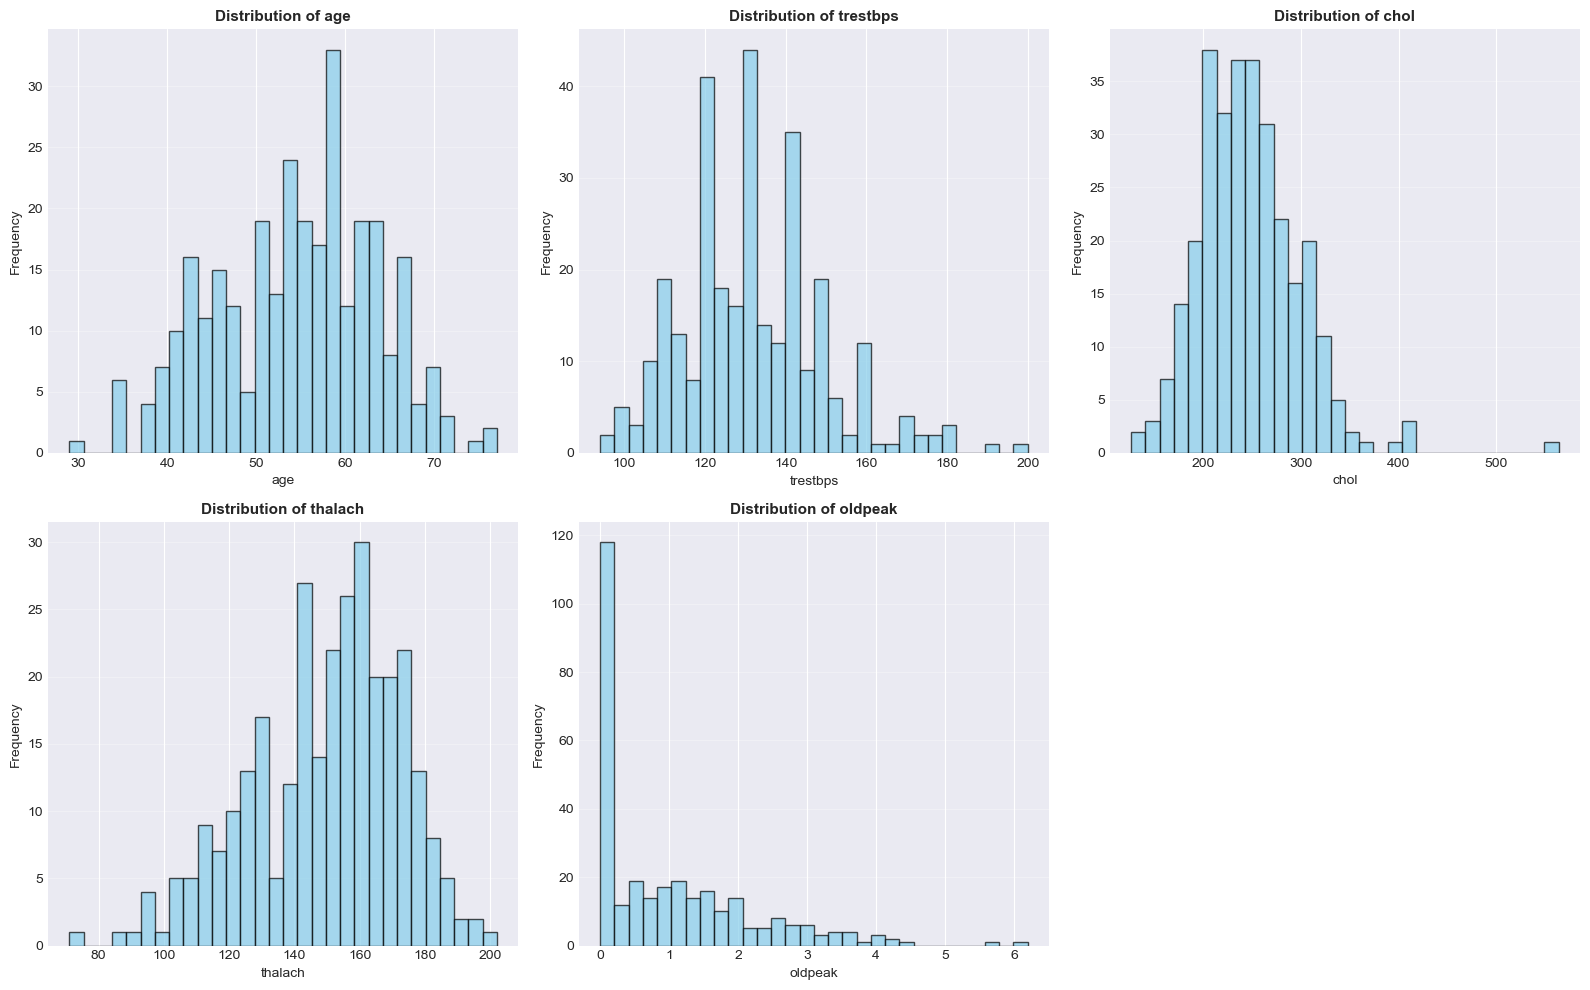

In [8]:
# Numerical features histograms
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('../screenshots/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

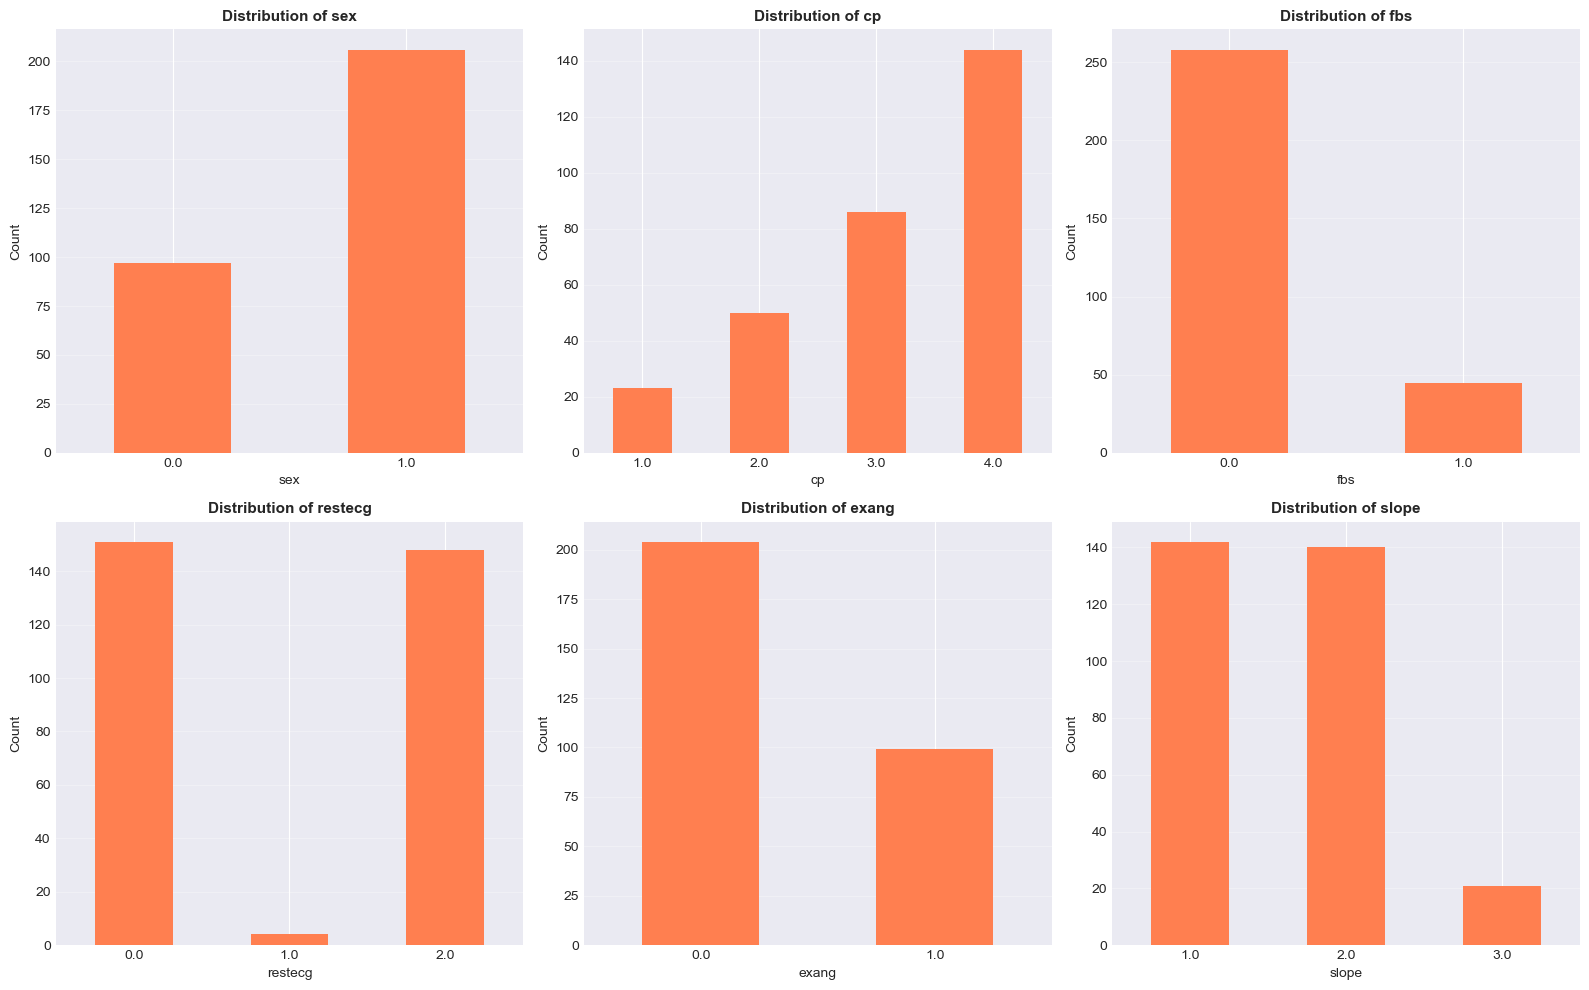

In [9]:
# Categorical features distribution
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    df[col].value_counts().sort_index().plot(kind='bar', ax=axes[idx], color='coral')
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=0)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../screenshots/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Correlation Analysis

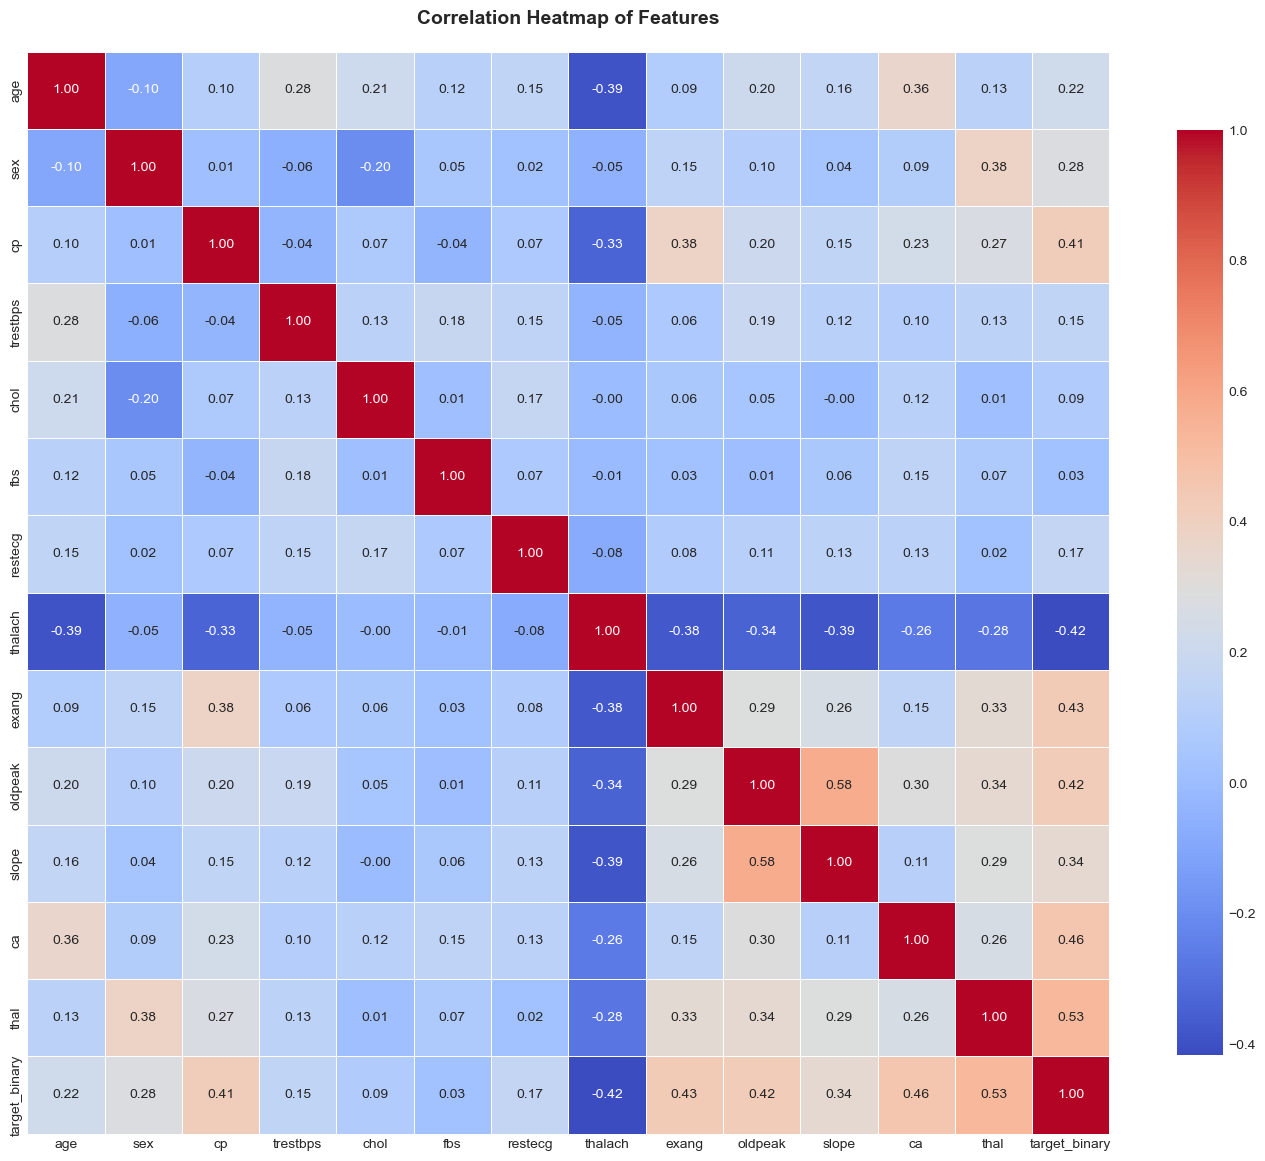

In [10]:
# Correlation matrix (handle missing values)
df_numeric = df.drop(['target'], axis=1).select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

# Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../screenshots/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

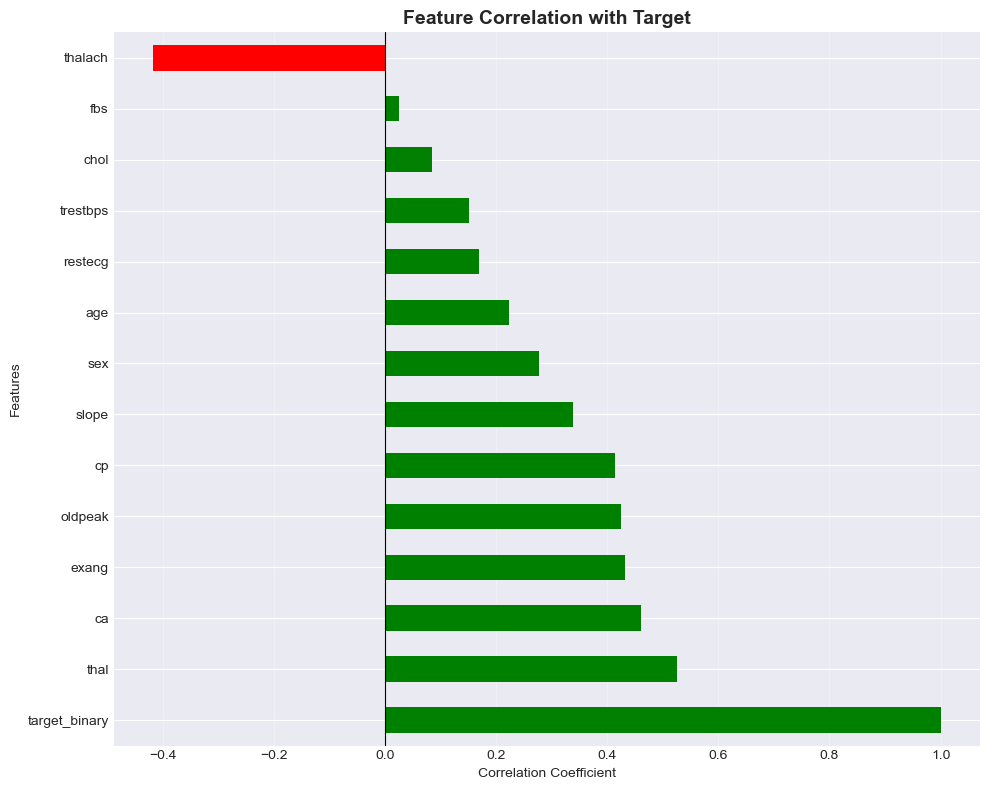


Top 5 Positively Correlated Features with Target:
target_binary    1.000000
thal             0.525689
ca               0.460442
exang            0.431894
oldpeak          0.424510
dtype: float64

Top 5 Negatively Correlated Features with Target:
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
dtype: float64


In [11]:
# Correlation with target
target_corr = df_numeric.corrwith(df['target_binary']).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
target_corr.plot(kind='barh', color=['green' if x > 0 else 'red' for x in target_corr])
plt.title('Feature Correlation with Target', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.tight_layout()
plt.savefig('../screenshots/target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 Positively Correlated Features with Target:")
print(target_corr.head())
print("\nTop 5 Negatively Correlated Features with Target:")
print(target_corr.tail())

## 7. Feature Relationships with Target

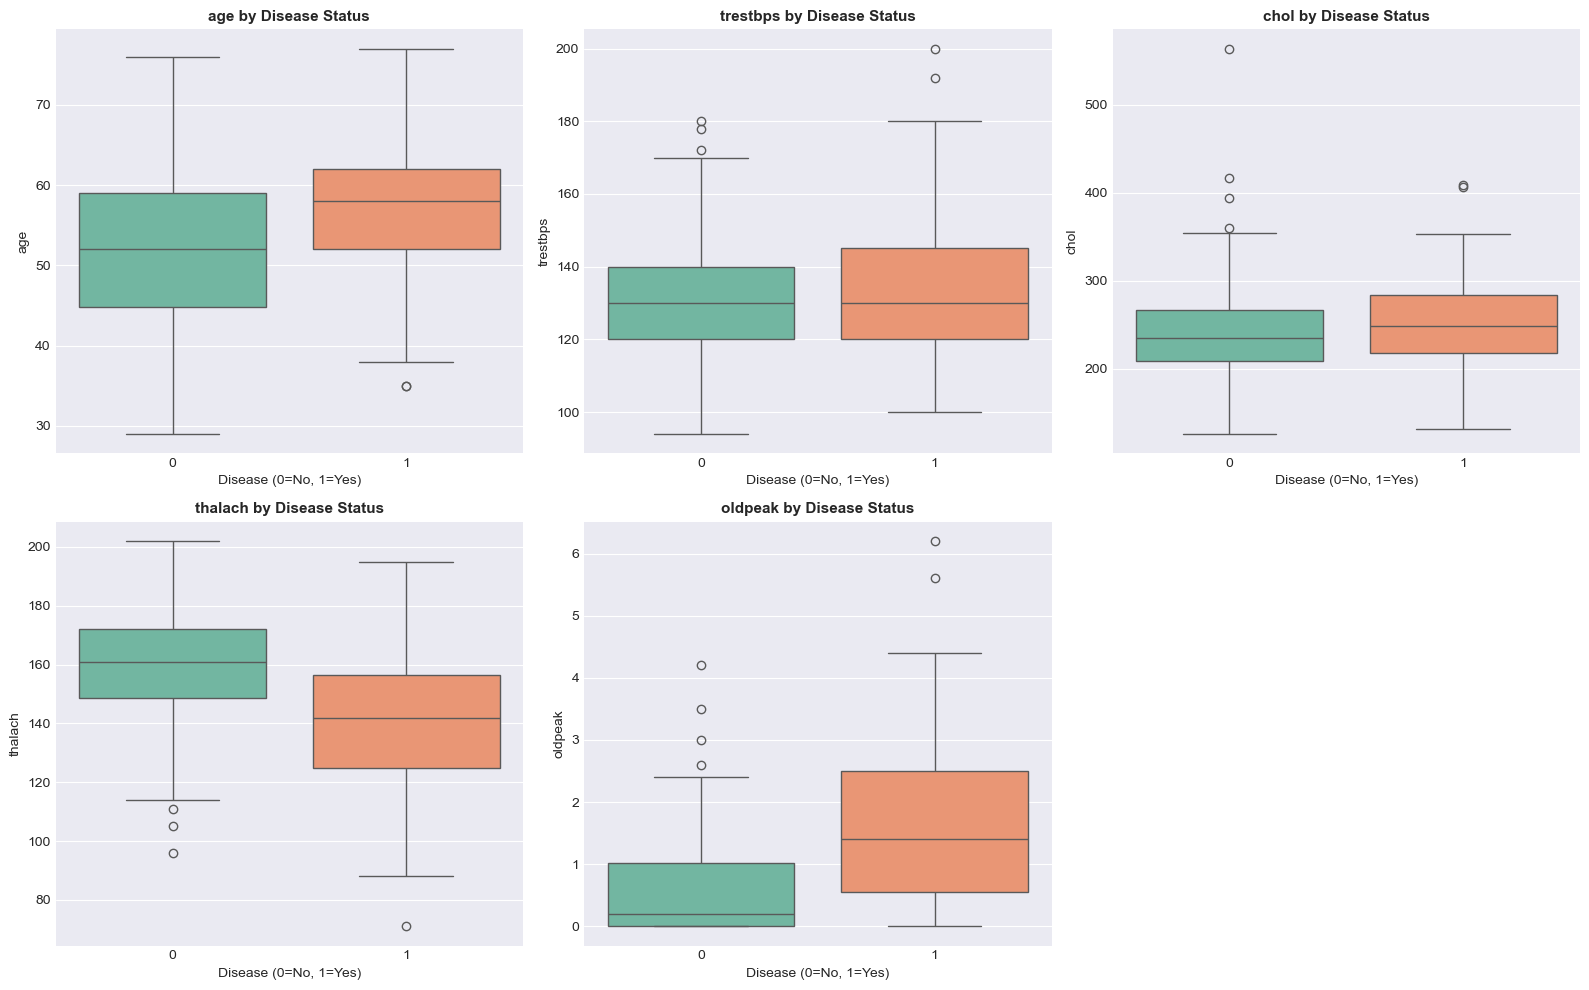

In [12]:
# Box plots for numerical features by target
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    sns.boxplot(x='target_binary', y=col, data=df, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} by Disease Status', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Disease (0=No, 1=Yes)')
    axes[idx].set_ylabel(col)

fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('../screenshots/feature_target_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Data Cleaning and Preprocessing

In [13]:
# Handle missing values (ca and thal columns)
print("Missing values before cleaning:")
print(df.isnull().sum())

# Strategy: Fill with mode for categorical features
df_clean = df.copy()
df_clean['ca'].fillna(df_clean['ca'].mode()[0], inplace=True)
df_clean['thal'].fillna(df_clean['thal'].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

# Use binary target
df_clean['target'] = df_clean['target_binary']
df_clean = df_clean.drop('target_binary', axis=1)

# Save cleaned dataset
df_clean.to_csv('../data/heart_disease_cleaned.csv', index=False)
print("\nCleaned dataset saved to '../data/heart_disease_cleaned.csv'")
print(f"Final dataset shape: {df_clean.shape}")

Missing values before cleaning:
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
target           0
target_binary    0
dtype: int64

Missing values after cleaning:
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
target           0
target_binary    0
dtype: int64

Cleaned dataset saved to '../data/heart_disease_cleaned.csv'
Final dataset shape: (303, 14)


## 9. Key Insights from EDA

### Dataset Overview:
- Total samples: 303 patients
- Features: 14 (13 features + 1 target)
- Missing values: Minimal (ca: 4, thal: 2)

### Target Distribution:
- Dataset is relatively balanced between disease and no disease cases
- Binary classification: Presence (1) vs Absence (0) of heart disease

### Important Features (Based on Correlation):
1. **cp (chest pain type)**: Strong positive correlation with disease
2. **thalach (max heart rate)**: Positive correlation
3. **exang (exercise induced angina)**: Negative correlation
4. **oldpeak (ST depression)**: Negative correlation
5. **ca (number of major vessels)**: Negative correlation

### Data Quality:
- Minimal missing values (<2%)
- No obvious outliers that need removal
- Features are on different scales (need standardization)
- Mix of continuous and categorical features